#                       Book Recommendation System

With an increasing amount of information on the internet and a considerable increase in the number of users, it is essential for companies to search, map, and offer relevant information based on the preferences of users. An important functional means of providing personalized service to users is __Recommendation System__. This system uses Machine Learning algorithms and data analysis techniques to suggest items,content, or services that should be of interest to customers based on their past choices or by analyzing the preferences of similar users. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or content for them.

The project aims to create a Book recommendation system that best predicts user interests and recommend the suitable/appropriate books to them ,using various approaches like User based Collaborative Filtering and Item based Collaborative Filtering.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df1=pd.read_csv('book_model.csv')
df1.head()

,user_id,isbn,rating,User_Country,book_title,book_author,year_of_publication,publisher
0,278418,446520802,0,usa,The Notebook,Nicholas Sparks,1996,Warner Books
1,638,446520802,0,usa,The Notebook,Nicholas Sparks,1996,Warner Books
2,3363,446520802,0,usa,The Notebook,Nicholas Sparks,1996,Warner Books
3,7158,446520802,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
4,8253,446520802,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books


In [2]:
df1.shape

(111253, 8)

In [3]:
#Taking Data having rating greater than '0' as I have considered '0' Rating as that the Book has not been rated.
df=df1[df1['rating']>0]

In [4]:
df.reset_index(inplace=True)

In [5]:
df.drop(['index'],axis=1,inplace=True)

In [6]:
df

,user_id,isbn,rating,User_Country,book_title,book_author,year_of_publication,publisher
0,7158,446520802,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
1,8253,446520802,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
2,11676,446520802,10,n/a,The Notebook,Nicholas Sparks,1996,Warner Books
3,23768,446520802,6,usa,The Notebook,Nicholas Sparks,1996,Warner Books
4,27617,446520802,9,canada,The Notebook,Nicholas Sparks,1996,Warner Books
...,...,...,...,...,...,...,...,...
33338,244685,553290703,9,usa,Lightning,Patricia Potter,2002,Bantam Books
33339,246507,043935806x,10,usa,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
33340,246507,1568650299,8,usa,Memories of Midnight,Sidney Sheldon,1993,Doubleday Books
33341,247201,1410401634,7,australia,Q Is for Quarry,Sue Grafton,2003,Large Print Press


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
#Converting the ISBN's and User-ID's to arranged Numeric values using Label Encoding.
enc=LabelEncoder()
df['isbn']=enc.fit_transform(df['isbn'])
df['user_id']=enc.fit_transform(df['user_id'])

In [9]:
df.head()

,user_id,isbn,rating,User_Country,book_title,book_author,year_of_publication,publisher
0,55,1428,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
1,69,1428,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
2,101,1428,10,n/a,The Notebook,Nicholas Sparks,1996,Warner Books
3,207,1428,6,usa,The Notebook,Nicholas Sparks,1996,Warner Books
4,240,1428,9,canada,The Notebook,Nicholas Sparks,1996,Warner Books


In [10]:
#No NaN values present in our Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33343 entries, 0 to 33342
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              33343 non-null  int64 
 1   isbn                 33343 non-null  int64 
 2   rating               33343 non-null  int64 
 3   User_Country         33343 non-null  object
 4   book_title           33343 non-null  object
 5   book_author          33343 non-null  object
 6   year_of_publication  33343 non-null  int64 
 7   publisher            33343 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [11]:
df.describe()

,user_id,isbn,rating,year_of_publication
count,33343.000000,33343.000000,33343.000000,33343.000000
mean,1192.821462,1297.353687,7.912815,1996.901868
std,722.628647,766.988972,1.753404,6.058101
min,0.000000,0.000000,1.000000,1920.000000
25%,566.000000,606.000000,7.000000,1994.000000
50%,1175.000000,1296.000000,8.000000,1999.000000
75%,1819.000000,1957.000000,9.000000,2001.000000
max,2463.000000,2753.000000,10.000000,2005.000000


In [12]:
#Number of unique Authors.
df['book_author'].nunique()

709

In [13]:
#Number of unique Publishers.
df['publisher'].nunique()

388

In [14]:
#Number of unique Books.
df['book_title'].nunique()

1163

In [15]:
#Number of unique Users.
df['user_id'].nunique()

2464

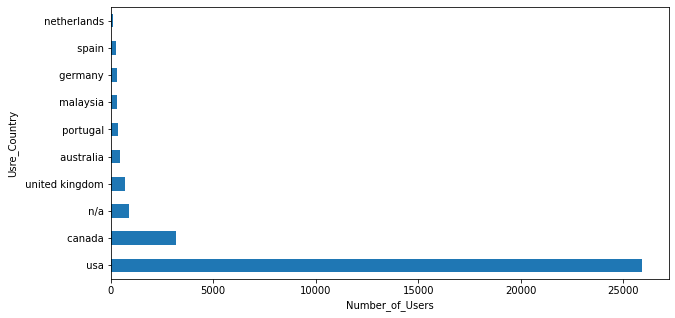

In [16]:
#Below list show top 10 countries according to number of Users.
#Usa has highest number of Users.
df.groupby(['User_Country']).user_id.count().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(10,5))
plt.ylabel('Usre_Country')
plt.xlabel('Number_of_Users')
plt.show()

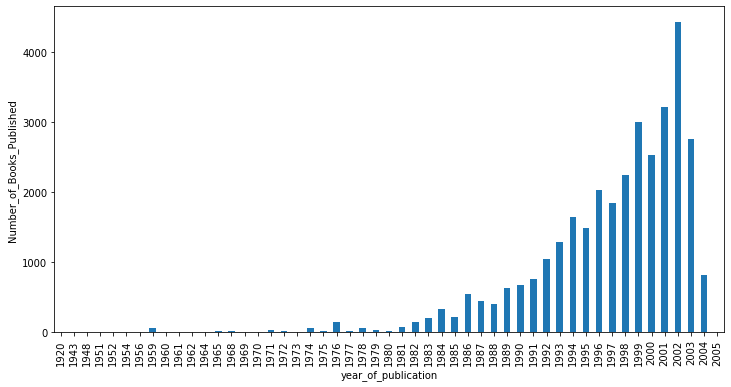

In [17]:
#Below plot show number of Books Published with increasing Years.
#2002 has highest number of Books Published.
df.groupby(['year_of_publication']).book_title.count().plot(kind='bar',figsize=(12,6))
plt.ylabel('Number_of_Books_Published')
plt.show()

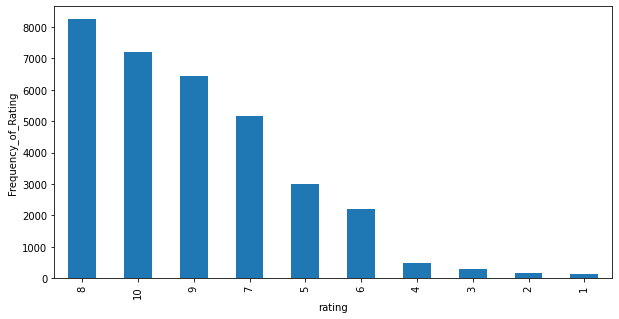

In [18]:
#Below plot show frequency of different types of ratings.
#The most frequent rating is '8' and least frequent is '1's.
df.groupby(['rating']).user_id.count().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('Frequency_of_Rating')
plt.show()

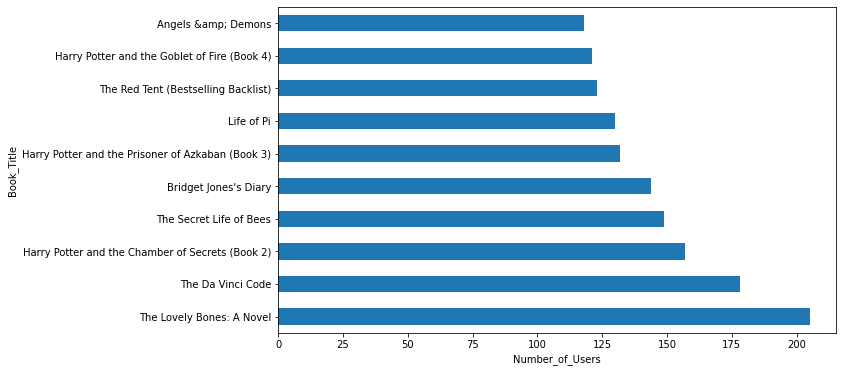

In [19]:
#Below plot show most popular 10 books according to number of users who have rated them .
#The most rated book is 'The Lovely Bones A Novel'.
df.groupby(['book_title']).user_id.count().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(10,6))
plt.xlabel('Number_of_Users')
plt.ylabel('Book_Title')
plt.show()

In [20]:
#Top 10 Books with highest mean rating
df.groupby(['book_title']).rating.mean().sort_values(ascending=False).head(10)

book_title
The Two Towers (The Lord of the Rings, Part 2)                                      9.522388
Charlotte's Web (Trophy Newbery)                                                    9.375000
A Tree Grows in Brooklyn                                                            9.375000
The Secret Garden                                                                   9.309524
Seabiscuit                                                                          9.263158
The Little Prince                                                                   9.166667
The Princess Bride: S Morgenstern's Classic Tale of True Love and High Adventure    9.161290
Harry Potter and the Goblet of Fire (Book 4)                                        9.148760
Up Island: A Novel                                                                  9.142857
Lolita (Vintage International)                                                      9.142857
Name: rating, dtype: float64

In [21]:
#Top 10 users according to number of times they have rated.
df.groupby(['user_id']).rating.count().sort_values(ascending=False).head(10)

user_id
101     906
153     202
913     173
1489    158
1005    158
1095    145
1530    143
946     126
753     116
576     112
Name: rating, dtype: int64

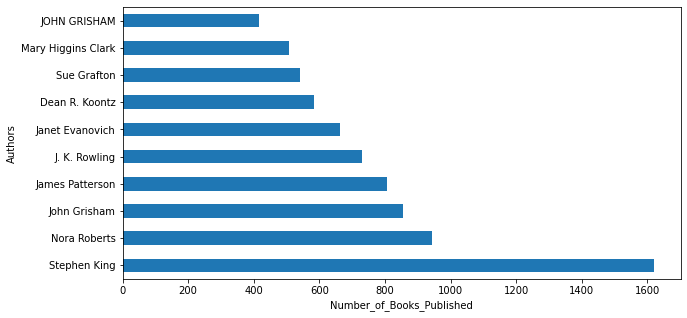

In [22]:
#Top 10 Authors according to number of Books they have Published.
#Top 10 Authors according number of times they have been rated by users.
df.groupby(['book_author']).book_title.count().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(10,5))
plt.xlabel('Number_of_Books_Published')
plt.ylabel('Authors')
plt.show()
#Stephen King is the most popular Author

In [23]:
#Top 10 Authors according highest mean rating given by user.
df.groupby(['book_author']).rating.mean().sort_values(ascending=False).head(10)
#Raymond Briggs is the most popular Author

book_author
Raymond Briggs            10.0
Sharon K. Garner          10.0
Golden Books              10.0
Graham Masterton          10.0
Joseph Amiel              10.0
Joan Grant                10.0
NORTON JUSTER             10.0
Jen McVeity               10.0
TONI MORRISON             10.0
Gabriel Garcia-Marquez    10.0
Name: rating, dtype: float64

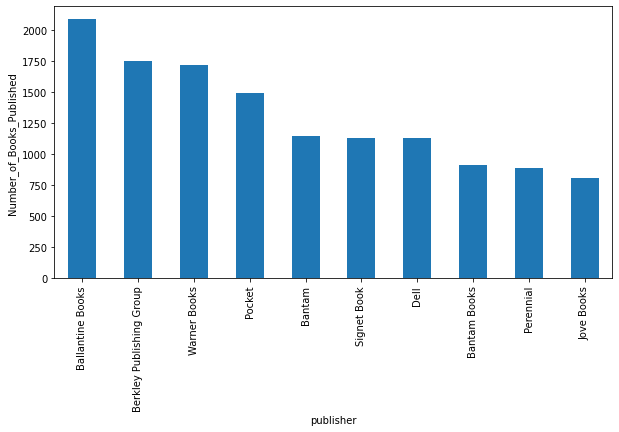

In [24]:
#Top 10 Publishers according to number of Books they have Published.
df.groupby(['publisher']).book_title.count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,5))
plt.ylabel('Number_of_Books_Published')
plt.show()

In [25]:
#Top 10 Publishers according to mean rating given by user.
df.groupby(['publisher']).rating.mean().sort_values(ascending=False).head(15)

publisher
Summit Books                            10.0
BBC Consumer Publishing                 10.0
Nick Hern Books                         10.0
Macmillan Children's Books              10.0
Bookthrift Co                           10.0
Houghton Mifflin Co                     10.0
Titan Books                             10.0
Cambridge University Press              10.0
Chivers Large Print                     10.0
Lothian Pub Co                          10.0
Suhrkamp Verlag                         10.0
Orion Publishing Co                     10.0
Shambhala                               10.0
Pan Macmillan                           10.0
Random House Books for Young Readers    10.0
Name: rating, dtype: float64

# Model Building - Item Based Collaborative Filtering

In [26]:
#Separating features required for model building.
df2=df[['user_id','isbn','rating','book_title']]
df2.head()

,user_id,isbn,rating,book_title
0,55,1428,10,The Notebook
1,69,1428,10,The Notebook
2,101,1428,10,The Notebook
3,207,1428,6,The Notebook
4,240,1428,9,The Notebook


In [27]:
#Finding mean rating for every book.
mean_ratings=pd.DataFrame(df2.groupby(['book_title']).rating.mean())
mean_ratings.head()

,rating
book_title,
1984,8.793103
1st to Die: A Novel,7.640449
2010: Odyssey Two,7.625000
24 Hours,7.500000
2nd Chance,7.636364


In [28]:
#Adding a column for how many times a book has been rated.
mean_ratings['Number_of_times_rated']=df2.groupby('book_title')['rating'].count()
mean_ratings.head()

,rating,Number_of_times_rated
book_title,,
1984,8.793103,58
1st to Die: A Novel,7.640449,89
2010: Odyssey Two,7.625000,16
24 Hours,7.500000,12
2nd Chance,7.636364,66


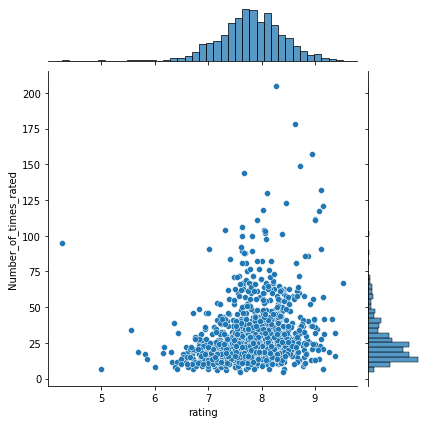

In [29]:
# import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='Number_of_times_rated', data=mean_ratings)
#From plot we can infer that Mean rating tends to be near 8 and most of the books have been rated approx 22 times.

In [30]:
#Creating User-Item interaction Matrix
book_matrix = df2.pivot_table(index='user_id', columns='book_title',values='rating')
book_matrix.head()

book_title,1984,1st to Die: A Novel,2010: Odyssey Two,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Finding top 10 rated books based on Popularity (Number of Times rated by User).
mean_ratings.sort_values('Number_of_times_rated',ascending=False).head(10)

,rating,Number_of_times_rated
book_title,,
The Lovely Bones: A Novel,8.268293,205
The Da Vinci Code,8.629213,178
Harry Potter and the Chamber of Secrets (Book 2),8.942675,157
The Secret Life of Bees,8.711409,149
Bridget Jones's Diary,7.666667,144
Harry Potter and the Prisoner of Azkaban (Book 3),9.113636,132
Life of Pi,8.107692,130
The Red Tent (Bestselling Backlist),8.455285,123
Harry Potter and the Goblet of Fire (Book 4),9.148760,121


# Making Recommendation Based on Book - The Da Vinci Code

In [32]:
#Separating the column for book 'The Da Vinci Code' from book matrix.
vinci_rating=book_matrix['The Da Vinci Code']
vinci_rating

user_id
0        NaN
1        NaN
2        NaN
3       10.0
4        NaN
        ... 
2459     NaN
2460     NaN
2461     NaN
2462     NaN
2463     NaN
Name: The Da Vinci Code, Length: 2464, dtype: float64

In [33]:
#Books similar to Book 'The Da Vinci Code' on basis of Correlation.
similar_vinci=book_matrix.corrwith(vinci_rating)
similar_vinci

book_title
1984                                                                 0.156386
1st to Die: A Novel                                                  0.664510
2010: Odyssey Two                                                         NaN
24 Hours                                                            -0.886621
2nd Chance                                                           0.496197
                                                                       ...   
Year of Wonders                                                     -0.015215
You Belong To Me                                                     0.485714
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values   -0.104496
Zoya                                                                -0.289346
\O\" Is for Outlaw"                                                 -1.000000
Length: 1163, dtype: float64

In [34]:
#Preparing a separate dataframe of books along with there correlation with the book The Da Vinci Code.
corr_vinci = pd.DataFrame(similar_vinci, columns=['Correlation'])
corr_vinci.dropna(inplace=True)
corr_vinci.head()

,Correlation
book_title,
1984,0.156386
1st to Die: A Novel,0.664510
24 Hours,-0.886621
2nd Chance,0.496197
4 Blondes,-0.662541


In [35]:
#Adding popularity column in our DataFrame.
corr_vinci = corr_vinci.join(mean_ratings['Number_of_times_rated'])
corr_vinci.head()

,Correlation,Number_of_times_rated
book_title,,
1984,0.156386,58
1st to Die: A Novel,0.664510,89
24 Hours,-0.886621,12
2nd Chance,0.496197,66
4 Blondes,-0.662541,19


In [36]:
#The recommended Books are as Follow.
corr_vinci[corr_vinci['Number_of_times_rated'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,Number_of_times_rated
book_title,,
The Da Vinci Code,1.000000,178
Where the Heart Is (Oprah's Book Club (Paperback)),0.866719,101
The Secret Life of Bees,0.642238,149
Harry Potter and the Order of the Phoenix (Book 5),0.625104,112
The Red Tent (Bestselling Backlist),0.463679,123
Harry Potter and the Chamber of Secrets (Book 2),0.394346,157
Angels &amp; Demons,0.353176,118
Life of Pi,0.232855,130
Harry Potter and the Goblet of Fire (Book 4),0.179918,121


# Model Building - User Based Collaborative Filtering

In [37]:
df

,user_id,isbn,rating,User_Country,book_title,book_author,year_of_publication,publisher
0,55,1428,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
1,69,1428,10,usa,The Notebook,Nicholas Sparks,1996,Warner Books
2,101,1428,10,n/a,The Notebook,Nicholas Sparks,1996,Warner Books
3,207,1428,6,usa,The Notebook,Nicholas Sparks,1996,Warner Books
4,240,1428,9,canada,The Notebook,Nicholas Sparks,1996,Warner Books
...,...,...,...,...,...,...,...,...
33338,2380,1905,9,usa,Lightning,Patricia Potter,2002,Bantam Books
33339,2400,110,10,usa,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
33340,2400,345,8,usa,Memories of Midnight,Sidney Sheldon,1993,Doubleday Books
33341,2409,267,7,australia,Q Is for Quarry,Sue Grafton,2003,Large Print Press


In [38]:
#Separating features required for model building.
df3=df[['user_id','isbn','rating','book_title']]
df3

,user_id,isbn,rating,book_title
0,55,1428,10,The Notebook
1,69,1428,10,The Notebook
2,101,1428,10,The Notebook
3,207,1428,6,The Notebook
4,240,1428,9,The Notebook
...,...,...,...,...
33338,2380,1905,9,Lightning
33339,2400,110,10,Harry Potter and the Order of the Phoenix (Boo...
33340,2400,345,8,Memories of Midnight
33341,2409,267,7,Q Is for Quarry


In [39]:
#Calculating mean rating for every book.
mean_ratings3=pd.DataFrame(df3.groupby(['book_title']).rating.mean())
mean_ratings3.head()

,rating
book_title,
1984,8.793103
1st to Die: A Novel,7.640449
2010: Odyssey Two,7.625000
24 Hours,7.500000
2nd Chance,7.636364


In [40]:
mean_ratings3['Number_of_times_rated']=df3.groupby('book_title')['rating'].count()
mean_ratings3.head()

,rating,Number_of_times_rated
book_title,,
1984,8.793103,58
1st to Die: A Novel,7.640449,89
2010: Odyssey Two,7.625000,16
24 Hours,7.500000,12
2nd Chance,7.636364,66


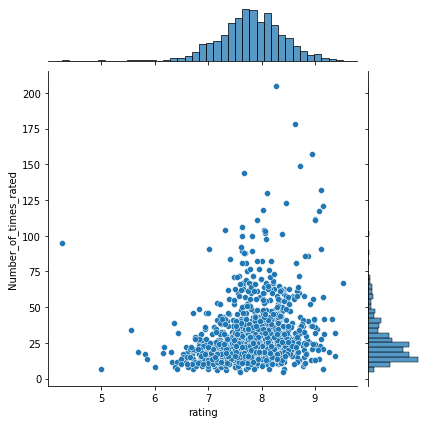

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='Number_of_times_rated', data=mean_ratings3)

#From plot we can infer that Mean rating tends to be near 8 and most of the books have been rated nearly 22 times.

In [42]:
book_matrix3 = df3.pivot_table(index='user_id', columns='book_title',values='rating')
book_matrix3.head()

book_title,1984,1st to Die: A Novel,2010: Odyssey Two,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Substracting mean rating of every user from all the rating given by him in order to normalize the matrix.
matrix_norm3=book_matrix3.subtract(book_matrix.mean(axis=1),axis='rows')
matrix_norm3.head()

book_title,1984,1st to Die: A Novel,2010: Odyssey Two,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,...,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.28125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-0.392857,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Finding correlation of every user with other users.
user_similarity=matrix_norm3.T.corr()
user_similarity.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
#Computing cosine similarity of User matrix.
user_similarity_cosine=cosine_similarity(matrix_norm3.fillna(0))
user_similarity_cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.00592227,
        0.        ],
       [0.        , 1.        , 0.03975589, ..., 0.        , 0.        ,
        0.03870351],
       [0.        , 0.03975589, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00592227, 0.        , 0.        , ..., 0.        , 1.        ,
        0.0567769 ],
       [0.        , 0.03870351, 0.        , ..., 0.        , 0.0567769 ,
        1.        ]])

# Predicting Book Recommendation for User 240

In [47]:
picked_id=240
user_similarity.drop(index=picked_id,inplace=True)
user_similarity.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Separating user which have similarity greater than 0.25 with our selected user '240'.
n=10
user_similarity_threshold=0.25
similar_users= user_similarity[user_similarity[picked_id]>user_similarity_threshold][picked_id].sort_values(ascending=False)[:n]
similar_users

user_id
2412    1.0
957     1.0
163     1.0
186     1.0
407     1.0
460     1.0
503     1.0
1938    1.0
709     1.0
1063    1.0
Name: 240, dtype: float64

In [49]:
#Removing the books already read by user '240'.
picked_userid_watched=matrix_norm3[matrix_norm3.index==picked_id].dropna(axis=1,how='all')
picked_userid_watched

book_title,2nd Chance,Anne Frank: The Diary of a Young Girl,Black House,Cause of Death,Desperation,Dreamcatcher,Everything's Eventual : 14 Dark Tales,From a Buick 8 : A Novel,Guilty as Sin,Intensity,It's Always Something,On Writing,Shogun,"The Drawing of the Three (The Dark Tower, Book 2)","The Gunslinger (The Dark Tower, Book 1)",The Notebook,The Two Dead Girls (Green Mile Series),"Wizard and Glass (The Dark Tower, Book 4)"
user_id,,,,,,,,,,,,,,,,,,
240,-3.888889,1.111111,1.111111,-3.888889,1.111111,1.111111,1.111111,1.111111,-1.888889,-2.888889,1.111111,1.111111,-0.888889,1.111111,1.111111,0.111111,1.111111,1.111111


In [50]:
similar_user_books= matrix_norm3[matrix_norm3.index.isin(similar_users.index)].dropna(axis=1,how='all')
similar_user_books

book_title,1st to Die: A Novel,2nd Chance,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Bend in the Road,A Great Deliverance,A Lesson Before Dying (Vintage Contemporaries (Paperback)),A Prayer for Owen Meany,A Time to Kill,A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),A Walk to Remember,...,We Were the Mulvaneys,Welcome to Temptation,What Looks Like Crazy On An Ordinary Day,Where the Red Fern Grows,While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Winter Solstice,You Belong To Me,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
163,NaN,NaN,3.66,NaN,NaN,1.66,NaN,-1.34,NaN,3.660000,...,-1.34,NaN,NaN,NaN,-2.34,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,-2.487179,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.512821,-0.487179,-0.487179,-1.487179,NaN
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,-1.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,NaN,NaN,NaN,-1.324324,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675676,NaN,NaN
957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.195122,NaN,NaN,-1.195122,NaN,NaN,NaN,-1.195122
1063,-0.1,-0.100000,NaN,NaN,NaN,NaN,0.9,NaN,0.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
similar_user_books.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
similar_user_books

book_title,1st to Die: A Novel,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Bend in the Road,A Great Deliverance,A Lesson Before Dying (Vintage Contemporaries (Paperback)),A Prayer for Owen Meany,A Time to Kill,A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),A Walk to Remember,ANGELA'S ASHES,...,We Were the Mulvaneys,Welcome to Temptation,What Looks Like Crazy On An Ordinary Day,Where the Red Fern Grows,While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Winter Solstice,You Belong To Me,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
163,NaN,3.66,NaN,NaN,1.66,NaN,-1.34,NaN,3.660000,1.66,...,-1.34,NaN,NaN,NaN,-2.34,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,-2.487179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.512821,-0.487179,-0.487179,-1.487179,NaN
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,NaN,NaN,-1.324324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675676,NaN,NaN
957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.195122,NaN,NaN,-1.195122,NaN,NaN,NaN,-1.195122
1063,-0.1,NaN,NaN,NaN,NaN,0.9,NaN,0.9,NaN,-0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# A dictionary to store item scores
item_score = {}
# Loop through items
for i in similar_user_books.columns:
  
  book_rating = similar_user_books[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    
    if pd.isna(book_rating[u]) == False:
      
      score = similar_users[u] * book_rating[u]
      
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count
# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['book', 'book_score'])
    

ranked_item_score = item_score.sort_values(by='book_score', ascending=False)

m = 10
ranked_item_score.head(m)

,book,book_score
264,The Reptile Room (A Series of Unfortunate Even...,3.660000
285,The Wide Window (A Series of Unfortunate Event...,3.660000
1,A 2nd Helping of Chicken Soup for the Soul (Ch...,3.660000
211,The Catcher in the Rye,2.660000
210,The Bridges of Madison County,2.660000
37,Charlotte's Web (Trophy Newbery),2.512821
65,East of Eden (Oprah's Book Club),2.512821
76,Fortune's Rocks: A Novel,2.512821
199,The Bad Beginning (A Series of Unfortunate Eve...,2.086410
8,A Walk to Remember,2.007966


In [53]:
# Average rating for the picked user
avg_rating = book_matrix[book_matrix.index == picked_id].T.mean()[picked_id]
# Print the average Book rating for user 1
print(f'The average Book rating for user {picked_id} is {avg_rating:.2f}')


The average Book rating for user 240 is 8.89


In [54]:
#The Book Recommended for User 240 are as below.
ranked_item_score['predicted_rating'] = ranked_item_score['book_score'] + avg_rating
# Take a look at the data
ranked_item_score.head(m)

,book,book_score,predicted_rating
264,The Reptile Room (A Series of Unfortunate Even...,3.660000,12.548889
285,The Wide Window (A Series of Unfortunate Event...,3.660000,12.548889
1,A 2nd Helping of Chicken Soup for the Soul (Ch...,3.660000,12.548889
211,The Catcher in the Rye,2.660000,11.548889
210,The Bridges of Madison County,2.660000,11.548889
37,Charlotte's Web (Trophy Newbery),2.512821,11.401709
65,East of Eden (Oprah's Book Club),2.512821,11.401709
76,Fortune's Rocks: A Novel,2.512821,11.401709
199,The Bad Beginning (A Series of Unfortunate Eve...,2.086410,10.975299
8,A Walk to Remember,2.007966,10.896855
